# The Best Market to Advertise on

In this research, the researchers are focusing on a e-learning company that offers courses on programming. Most of the courses are on web and mobile development, but it also covers other domains like data science, game development and etc. The client wants to promote their product and they would like to invest some money in the advertisement. The goal of this project is to find out two best markets to advertise the products in.

We are now going to focus first on the survey conducted by FreeCodeCamp's 2017 New Coder Survey.

### FCC New Coders Survey

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

In [2]:
#reading the files
fcc_survey = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv", low_memory = False)

In [3]:
print(fcc_survey.shape)
with pd.option_context('display.max_rows', 100, 'display.max_columns', 500):
    display(fcc_survey.head())

(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

This dataset is about
1. Demographic of the people having interest in coding 
2. what they like
3. where do they live 

Since the client offers wide range of course, the resarchers through this data could find
1. Where the new coders located
2. Which area has the most new coders
3. Find how much they are willing to spend money for the course

The researchers are going to use the cleanned data instead of organizing the raw data because the cleanned data has a cleaner format and it is easier to take some insight from it since we have known what we want to know. The dataset can be downloaded in the __[Github](https://github.com/freeCodeCamp/2017-new-coder-survey/tree/master/clean-data)__.


Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose.

In [4]:
interest_in_job = fcc_survey["JobRoleInterest"].value_counts(normalize = True)*100

In [5]:
display(interest_in_job)

Full-Stack Web Developer                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                                                                                                                

From the data it can be seen that most of them are having interest in web developer including front-end back-end and more, so even though they dont only like a specific interest we can still use this as our basis of seeing which area has the potential to promote our products.

In [6]:
#Since the client wants to foucs on web and mobile development we will dig further
fcc_survey["web_developer"] = fcc_survey["JobRoleInterest"].str.contains("Web Developer|Mobile Developer")


Text(0.5, 1.08, 'Mobile/Web Developer vs Others')

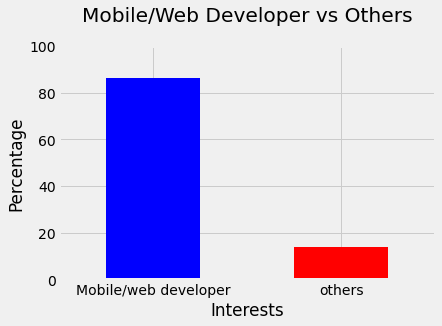

In [7]:
#Plotting the difference between others and web or mobile interest
%matplotlib inline
freq_table = fcc_survey["web_developer"].value_counts(normalize = True)*100
#making the plot
plt.style.use("fivethirtyeight")
ax = freq_table.plot.bar(color = ["b","r"])
ax.set_xticklabels(["Mobile/web developer","others"], rotation = 0)
ax.set_ylim(0,100)
ax.set_ylabel("Percentage")
ax.set_xlabel("Interests")
ax.set_title("Mobile/Web Developer vs Others", y = 1.08)

This can be seen that more than 80% of the sample have interest in either mobile or web development

Now the researchers are going to find which are has the highest density of new coders. therefore, the respondents that are not choosing something in their interest will be dropped since their interest is unknown.

In [8]:
#Dropping the null values
fcc_survey.dropna(subset = ["JobRoleInterest"], inplace = True)

In [9]:
#inspecting the country live
freq_count = pd.DataFrame({"relative" : fcc_survey["CountryLive"].value_counts(normalize = True)
                           *100, "absolute" : fcc_survey["CountryLive"].value_counts()})

In [10]:
freq_count

,relative,absolute
United States of America,45.700497,3125
India,7.721556,528
United Kingdom,4.606610,315
Canada,3.802281,260
Poland,1.915765,131
...,...,...
Gibraltar,0.014624,1
Bolivia,0.014624,1
Aruba,0.014624,1
Liberia,0.014624,1


Based on the data relatively and abosultely the best place to market on is united states and India. However, this information is not enough. We need to find which have the more wills to pay for the courses. Therefore, we are going to focus only to the USA, India, UK and Canada, since they:
1. Have big absolute frequency
2. Use English as Medium 

### Spend Per month

In [11]:
fcc_survey["MonthsProgramming"] = fcc_survey["MonthsProgramming"].replace(0,1)

In [12]:
fcc_survey["spend_permonth"] = fcc_survey["MoneyForLearning"] / fcc_survey["MonthsProgramming"]

In [13]:
fcc_survey["spend_permonth"].notnull().value_counts()

True     6317
False     675
Name: spend_permonth, dtype: int64

In [14]:
fcc_new = fcc_survey[fcc_survey["spend_permonth"].notnull()].copy()

In [15]:
fcc_new = fcc_survey[fcc_survey["CountryLive"].notnull()].copy()

In [16]:
pd.DataFrame({"Mean" : fcc_new.groupby(["CountryLive"])["spend_permonth"].mean(), "Median" : fcc_new.groupby(["CountryLive"])["spend_permonth"].median(), "Mode" : fcc_new.groupby(["CountryLive"])["spend_permonth"].agg(pd.Series.mode)}).loc[["United States of America","India","United Kingdom","Canada"]]

,Mean,Median,Mode
CountryLive,,,
United States of America,227.997996,3.333333,0
India,135.100982,0.000000,0
United Kingdom,45.534443,0.000000,0
Canada,113.510961,0.000000,0


From this it can be found that despite UK having a more new coders in terms of numbers but in Canada, the users are spending more in average. But this might be because of potential outlier, therefore we are going to find the outlier and clean things up first to re-check.

In [17]:
#Plotting the box plot
fcc_up = fcc_new[fcc_new["CountryLive"].apply(lambda x : x in["United States of America", "India", "United Kingdom", "Canada"])]

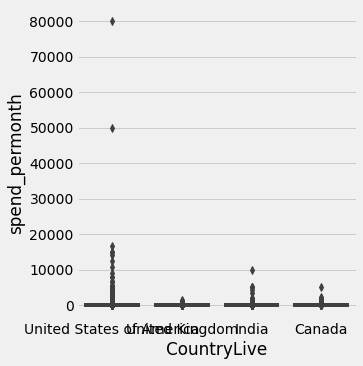

In [18]:
sns.catplot(x = "CountryLive", y = "spend_permonth", kind = "box", data = fcc_up)

In [19]:
(fcc_up["spend_permonth"]>000).value_counts()

False    2157
True     2071
Name: spend_permonth, dtype: int64

From the graph it can be seen that there is two people in US spend more tahan 50000 for online course which is unlikely therefore, we are going to only keep the spend per month below 20000

In [20]:
fcc_up = fcc_up[fcc_up["spend_permonth"] < 20000]

In [21]:
pd.DataFrame({"Mean" : fcc_up.groupby(["CountryLive"])["spend_permonth"].mean(), "Median" : fcc_up.groupby(["CountryLive"])["spend_permonth"].median(), "Mode" : fcc_up.groupby(["CountryLive"])["spend_permonth"].agg(pd.Series.mode)}).loc[["United States of America","India","United Kingdom","Canada"]]

,Mean,Median,Mode
CountryLive,,,
United States of America,183.800110,3.333333,0.0
India,135.100982,0.000000,0.0
United Kingdom,45.534443,0.000000,0.0
Canada,113.510961,0.000000,0.0


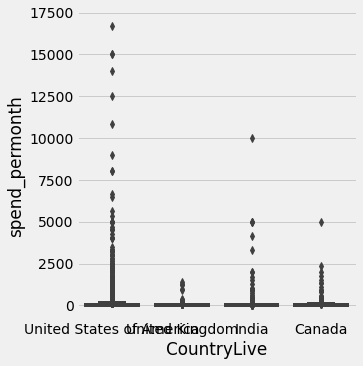

In [22]:
sns.catplot(x = "CountryLive", y = "spend_permonth", kind = "box", data = fcc_up)

There still outliers in India and Canada, we will look through their data and find whether it is a good data to be considered or not

In [23]:
India_outliers = fcc_up[(fcc_up["CountryLive"] == "India") & (fcc_up["spend_permonth"] > 2500) & (fcc_up["AttendedBootcamp"] == 0)].copy()

In [24]:
fcc_up.drop(India_outliers.index,inplace = True)

C:\Users\asus\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [25]:
USA_outliers = fcc_up[(fcc_up["CountryLive"] == "United States of America") & (fcc_up["spend_permonth"] >6000) & (fcc_up["AttendedBootcamp"] == 0)].copy()

In [26]:
us_sec = fcc_up[(fcc_up["CountryLive"] == "United States of America") & (fcc_up["spend_permonth"] > 6000) & (fcc_up["AttendedBootcamp"] == 1) & (fcc_up["MonthsProgramming"] <= 3)].copy()

In [27]:
fcc_up.drop(USA_outliers.index,inplace = True)
fcc_up.drop(us_sec.index,inplace = True)

C:\Users\asus\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [28]:
can_outliers = fcc_up[(fcc_up["CountryLive"] == "Canada") & (fcc_up["spend_permonth"] > 2500) & (fcc_up["AttendedBootcamp"] == 0)].copy()

In [29]:
sec_out = fcc_up[(fcc_up["CountryLive"] == "Canada") & (fcc_up["spend_permonth"] > 2500) & (fcc_up["AttendedBootcamp"] == 1)].copy()

We will also drop this since this person will not likely to purchase or spend money in the net couple months, he just started the bootcamp it explain his spend per month will be highers

In [30]:
fcc_up.drop(can_outliers.index,inplace = True)
fcc_up.drop(sec_out.index,inplace = True)

C:\Users\asus\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


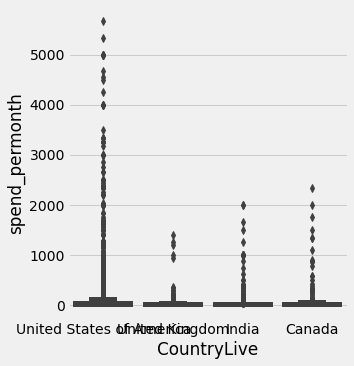

In [31]:
sns.catplot(x = "CountryLive", y = "spend_permonth", kind = "box", data = fcc_up)

In [32]:
pd.DataFrame({"Mean" : fcc_up.groupby(["CountryLive"])["spend_permonth"].mean(), "Median" : fcc_up.groupby(["CountryLive"])["spend_permonth"].median(), "Mode" : fcc_up.groupby(["CountryLive"])["spend_permonth"].agg(pd.Series.mode)}).loc[["United States of America","India","United Kingdom","Canada"]]

,Mean,Median,Mode
CountryLive,,,
United States of America,142.654608,3.333333,0.0
India,65.758763,0.000000,0.0
United Kingdom,45.534443,0.000000,0.0
Canada,93.065400,0.000000,0.0


It can be concluded that there is some extreme outliers that was deleted. This is because it is kind of impossible to spend money more than 2500 without attending bootcamp and if they are attending bootcamp we have skipped them if their months programming is less than or equal to 3 months since they will not spend more money in the next month. 

### Potential Customers
Ofcourse for the potential market that can be a good place to advetise on will be the US Market as the Mean for the spend per month and their numbers are much bigger compare to the others

In [35]:
fcc_up["CountryLive"].value_counts(normalize = True)*100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

By this table we can decide that maybe India Is the second market that we need to advertise on. However, we need to check again whether they spend per mont is higher than 59 dollar since our clients' product is in that price point

In [36]:
fcc_up[fcc_up["spend_permonth"] >= 59]["CountryLive"].value_counts(normalize = True)*100

United States of America    81.172070
India                        8.603491
United Kingdom               5.361596
Canada                       4.862843
Name: CountryLive, dtype: float64

This conclude that India is the next market that our clients can advetise on. 

There will be some options:
1. Focus on the US and use the budget 100%
2. Focus on the US and India and split it unequally 70% for US and 30% for India
3. Canada can be the second option after India as on average the money they spend per month is \$93 compare to India \\$66 This will be given to the clients and they will decide what market they want to advetise on further